### Unsupervied Learning algorithm (KMEANS)

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn import datasets

sns.set_style('darkgrid')
sns.set_palette('husl')

In [30]:
data = datasets.load_iris(as_frame=True)['data']


In [35]:
data.rename(columns={'sepal length (cm)':'sepal length', 
                     'sepal width (cm)':'sepal width', 
                     'petal length (cm)':'petal length',
       'petal width (cm)': 'petal width'}, inplace = True)

In [ ]:
model = KMeans(n_clusters= 3, random_state= 32)

model.fit(data)

pred = model.predict(data)

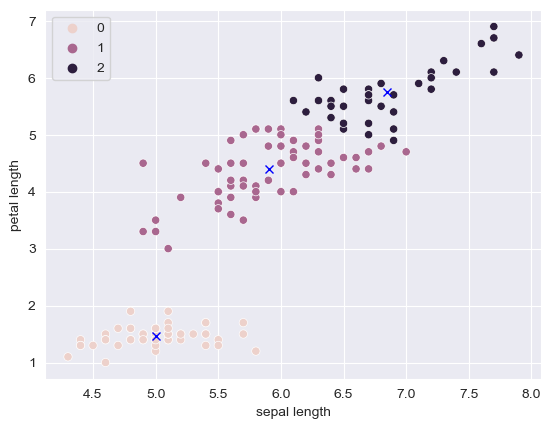

In [46]:
sns.scatterplot(data=data, x = 'sepal length', y = 'petal length', hue = pred)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]


plt.plot(centers_x, centers_y, 'xb')

In [47]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [50]:
model.inertia_

78.851441426146

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



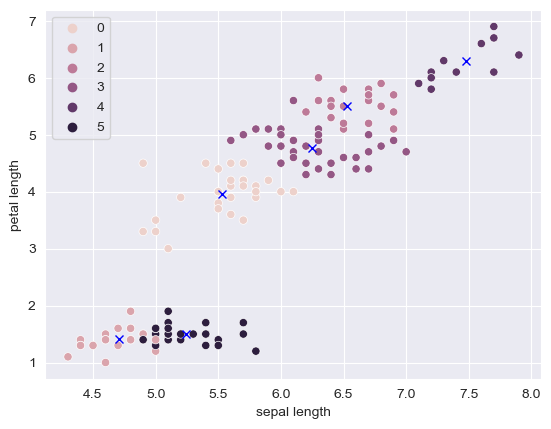

In [51]:
model_2 = KMeans(n_clusters= 6, random_state= 32)

model_2.fit(data)

pred2 = model_2.predict(data)

centers2_x, centers2_y = model_2.cluster_centers_[:,0], model_2.cluster_centers_[:,2]

sns.scatterplot(data=data, x ='sepal length', y = 'petal length', hue = pred2)

plt.plot(centers2_x, centers2_y, 'xb')

In [52]:
model_2.inertia_

39.066035353535355

### Elbow Chart for determining the optimal K 

In [ ]:
inertia = []
options = list(range(2, 13))

for cluster in options:
    model = KMeans(n_clusters=cluster, random_state=32, n_init=10).fit(data)
    inertia.append(model.inertia_)


In [57]:
data['species'] = ['setosa' if x == 0 else 'versicolor' if x == 1 else 'virginica'
                   for x in pred]

In [62]:
px.scatter(data_frame=data, x = 'sepal length', y = 'petal length',
           color = 'species')

In [64]:
data.head(5)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
